In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [4]:
env = gym.make('Blackjack-v0')

In [5]:
def sample_policy(observation):
    score,dealer_score,usable_ace = observation
    return 0 if score>=20 else 1

In [14]:
def generate_episode(policy,env):
    states,actions,rewards = [],[],[]
    
    observation = env.reset()
    
    while True:
        states.append(observation)
        
        action = sample_policy(observation)
        actions.append(action)
        
        observation,reward,done,info = env.step(action)
        rewards.append(reward)
        
        if done:
            break
    return states,actions,rewards
        

In [17]:
def first_visit_mc_prediction(policy,env,n_episodes):
    value_table = defaultdict(float)
    N = defaultdict(int)
    
    for _ in range(n_episodes):
        states,_,rewards = generate_episode(policy,env)
        returns = 0
        
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            
            returns += R
            
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S] / N[S])
                
    return value_table

In [18]:
value = first_visit_mc_prediction(sample_policy,env,n_episodes=500)

In [19]:
value

defaultdict(float,
            {(14, 4, False): -1.2500000000000002,
             (20, 10, True): 3.0,
             (19, 10, True): 0.6666666666666667,
             (18, 10, True): -0.5,
             (13, 10, True): 1.5,
             (21, 3, False): 4.888888888888889,
             (17, 3, False): 0.875,
             (8, 3, False): 1.0,
             (6, 3, False): -1.0,
             (15, 5, False): -1.2999999999999998,
             (10, 5, False): -2.0,
             (8, 5, False): -2.5,
             (18, 7, False): -2.5,
             (14, 7, False): -3.0,
             (17, 7, True): -1.0,
             (20, 4, False): 4.222222222222222,
             (15, 4, False): -1.5,
             (12, 4, False): -1.5,
             (7, 4, False): -1.0,
             (15, 10, False): -6.866666666666665,
             (10, 10, False): 0.5,
             (12, 9, False): -1.0,
             (17, 10, False): -5.526315789473684,
             (13, 10, False): -6.0,
             (21, 10, True): 5.0,
             

In [30]:
def plot_blackjack(V, ax1,ax2):
    player_sum = np.arange(12,21+1)
    dealer_show = np.arange(1,10+1)
    usable_ace = np.array([False, True])
    state_values=np.zeros((len(player_sum),len(dealer_show), len(usable_ace)))
    
    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k,ace in enumerate(usable_ace):
                state_values[i,j,k] = V[player,dealer,ace]
    X,Y = np.meshgrid(player_sum,dealer_show)
    
    ax1.plot_wireframe(X,Y,state_values[:,:,0])
    ax2.plot_wireframe(X,Y,state_values[:,:,1])
    
    for ax in ax1,ax2:
        ax.set_zlim(-1,1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer show')
        ax.set_zlabel('state-value')
        

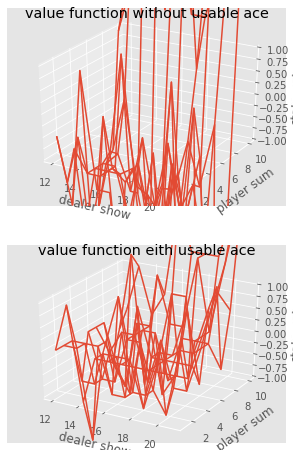

In [31]:
fig,axes=pyplot.subplots(nrows=2,figsize=(5,8),subplot_kw={'projection':'3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function eith usable ace')
plot_blackjack(value,axes[0],axes[1])